# Introduction to NLTK

This notebook is designed to be used alongside the book _Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit_, written by Steven Bird, Ewan Klein, and Edward Loper of Stanford University, who developed NLTK.

This notebook is based on the following sources:

- [NLTK book, chapter 1](https://www.nltk.org/book/ch01.html)
- [NLTK tutorial](https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/)
- [Practice parsing text in NLP with Python](https://opensource.com/article/20/8/intro-python-nltk)

First install nltk using

    conda install -c anaconda nltk
    

In [1]:
import nltk

You now need to select what corpora (plural of corpus!) and packages you require. For this notebook, it is sufficient to select just the "book" identifier. After running this, it is better to comment out the next line so it is not run again.

In [2]:
#nltk.download()

## Assign some text and tokenise it

First we just check that we can tokenize a short piece of text.

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

maSpeech = """Friends, Romans, countrymen, lend me your ears;
I come to bury Caesar, not to praise him.
The evil that men do lives after them;
The good is oft interred with their bones;
So let it be with Caesar."""

First we split the text into sentences.

In [4]:
print(sent_tokenize(maSpeech))

['Friends, Romans, countrymen, lend me your ears;\nI come to bury Caesar, not to praise him.', 'The evil that men do lives after them;\nThe good is oft interred with their bones;\nSo let it be with Caesar.']


Now we split the text into words. Note that punctuation elements (like commas and full stops) are also treated as "word" tokens.

In [5]:
print(word_tokenize(maSpeech))

['Friends', ',', 'Romans', ',', 'countrymen', ',', 'lend', 'me', 'your', 'ears', ';', 'I', 'come', 'to', 'bury', 'Caesar', ',', 'not', 'to', 'praise', 'him', '.', 'The', 'evil', 'that', 'men', 'do', 'lives', 'after', 'them', ';', 'The', 'good', 'is', 'oft', 'interred', 'with', 'their', 'bones', ';', 'So', 'let', 'it', 'be', 'with', 'Caesar', '.']


## Stage 1: Remove punctuation and make the text lower case

We use python's _regular expression_ library `re` to exclude non-alphanumeric characters, such as punctuation, and python's inbuilt `lower()`fnction to convert all alphabetic characters to lower case.

In [6]:
import re
text = re.sub(r"[^a-zA-Z0-9]", " ", maSpeech.lower())
print(text)

friends  romans  countrymen  lend me your ears  i come to bury caesar  not to praise him  the evil that men do lives after them  the good is oft interred with their bones  so let it be with caesar 


Now we can split the lower case text by spaces and we just get a list of those words, without punctuation.

In [7]:
words = maSpeech.split()
print(words)

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;', 'I', 'come', 'to', 'bury', 'Caesar,', 'not', 'to', 'praise', 'him.', 'The', 'evil', 'that', 'men', 'do', 'lives', 'after', 'them;', 'The', 'good', 'is', 'oft', 'interred', 'with', 'their', 'bones;', 'So', 'let', 'it', 'be', 'with', 'Caesar.']


## Stage 2: Remove stopwords

There are many words in the English language that do not add much information by themselves. As such they can usually be removed, as they are just "noise" added to the more useful words that carry most of the meaning of the text.

In [8]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

# Remove stop words, using a list comprehension
filteredWords = [w for w in words if w not in stopwords.words("english")]
print(filteredWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Note that many of the words have been removed, but those that are left are the "interesting" ones.

## Stage 3a: Stemming

Some words are essentially similar, e.g., "friend" and "friends" or "come" and "came". In NLP terms, each such pair is derived from a "stem" word. NLTK offers Porter, Lancaster and Snowball stemmers, which help to standardise the text as follows. 

In [9]:
from nltk.stem.porter import PorterStemmer
# Reduce words to their stems
porterStemmed = [PorterStemmer().stem(w) for w in filteredWords]
print(porterStemmed)

['friends,', 'romans,', 'countrymen,', 'lend', 'ears;', 'i', 'come', 'buri', 'caesar,', 'prais', 'him.', 'the', 'evil', 'men', 'live', 'them;', 'the', 'good', 'oft', 'inter', 'bones;', 'so', 'let', 'caesar.']


Note that some word stems are not quite right, e.g., "buri" should be "bury". The error is because the Porter stemming rule was to remove "ed" from the end of the word, where it is found. This rule might work in many cases, but there are exceptions, as here.

# Stage 3b: Lemmatisation

An alternative approach, that is often more reliable (though the need to lookup a language-specific dictionary can make it run slowly with large amounts of text), is called lemmatisation. A _lemma_ is a candidate root that is obtained by looking up a database of real words. We try this as an alternative standardisation technique.

In [10]:
#nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
# Reduce words to their root form
wnLemmed = [WordNetLemmatizer().lemmatize(w) for w in filteredWords]
print(wnLemmed)

['Friends,', 'Romans,', 'countrymen,', 'lend', 'ears;', 'I', 'come', 'bury', 'Caesar,', 'praise', 'him.', 'The', 'evil', 'men', 'life', 'them;', 'The', 'good', 'oft', 'interred', 'bones;', 'So', 'let', 'Caesar.']


Note that lemmatisation has generally performed better, but it failed to notice that "interred" is the past tense of "inter" (to bury), whereas the Porter stemmer correctly applied a rule that transformed "interred" to "inter".

## Next step - analytics

Now that we have preprocessed the words from our text, we can generate simple counts, showing how the original set was changed by the 3 stages of preprocessing above.

In [11]:
print("Number of words without punctuation {}".format(len(words)))
print("Number of words without punctuation and stopwords {}".format(len(filteredWords)))
print("Number of such words following stemming {}".format(len(porterStemmed)))
print("Number of such words following lemmatisation {}".format(len(wnLemmed)))

Number of words without punctuation 38
Number of words without punctuation and stopwords 24
Number of such words following stemming 24
Number of such words following lemmatisation 24


Now we count unique words. Python provides a set datatype, which has the property that its elements are distinct. So adding a list of elements to a set essentially removes repeats, so each element appears only once.

In [12]:
print("Number of distinct words without punctuation {}".format(len(set(words))))
print("Number of distinct words without punctuation and stopwords {}".format(len(set(filteredWords))))
print("Number of such distinct words following stemming {}".format(len(set(porterStemmed))))
print("Number of such distinct words following lemmatisation {}".format(len(set(wnLemmed))))

Number of distinct words without punctuation 35
Number of distinct words without punctuation and stopwords 23
Number of such distinct words following stemming 23
Number of such distinct words following lemmatisation 23


## Loading larger amounts of data

We have already installed several collections of text (books, speeches, blogs, posts, newspaper articles, etc.). To show more features of NLTK, we need to load these in memory and to analyse their text.

In [13]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


`texts()` prints the names and authorship of each of the texts and `sents()` prints the first sentence of each text.

## Concordance analysis

Noting that "text1" refers to "Moby Dick", we can look at the concordances of a key word like "monstrous", by viewing it in context.

In [14]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


It is obvious from these 11 examples that the author (Herman Melville) uses "monstrous" in the sense of "large", "imposing" and "dangerous".

Famously, the Book of Genesis often refers to long-lived individuals, so concordance analysis can help to select sentences relating to this topic.

In [15]:
text3.concordance("lived")

Displaying 25 of 38 matches:
ay when they were created . And Adam lived an hundred and thirty years , and be
ughters : And all the days that Adam lived were nine hundred and thirty yea and
nd thirty yea and he died . And Seth lived an hundred and five years , and bega
ve years , and begat Enos : And Seth lived after he begat Enos eight hundred an
welve years : and he died . And Enos lived ninety years , and begat Cainan : An
 years , and begat Cainan : And Enos lived after he begat Cainan eight hundred 
ive years : and he died . And Cainan lived seventy years and begat Mahalaleel :
rs and begat Mahalaleel : And Cainan lived after he begat Mahalaleel eight hund
years : and he died . And Mahalaleel lived sixty and five years , and begat Jar
s , and begat Jared : And Mahalaleel lived after he begat Jared eight hundred a
and five yea and he died . And Jared lived an hundred sixty and two years , and
o years , and he begat Eno And Jared lived after he begat Enoch eight hundred y
 and two ye

Each of the characters seemed to have lived for a long time....

Returning to "monstrous" and _Moby Dick_, it is also informative to see what other words are used by the author in a similar context. This can be done with the following code:

In [16]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


Given our understanding of language, we can see some of these as near-synonyms of "monstrous" as used by the author, although the others seem unrelated to that meaning.

Some corpora have a natural temporal ordering. For example, the addresses to Congress are ordered so that more recent speeches are found at the end of the corpus. Consequently, it is interesting to see how the popularity of certain terms has changed over time. Similar temporal patterns might be expected in news reports and social media posts, as words like "covid" or "Kardashian" rise and fall in importance. 

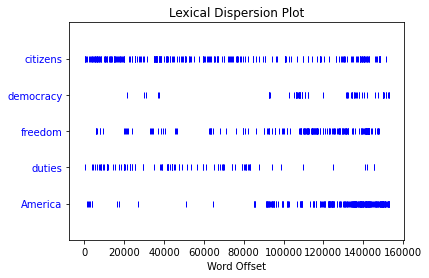

In [17]:
import numpy as np
import matplotlib.pyplot as plt
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

It is noticeable that "democracy", "freedom" and "America" are much more common in recent speeches, while "duties" has become less common.

Returning to the first text (Moby Dick), it is interesting to view the frequency distribution of words.  NLTK provides a function for that purpose. Rather than view all words, we just choose those that occur most frequently.

In [18]:
fdist1 = FreqDist(text1)
fdist1.most_common(40)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767)]

As you can see, most of the "words" are either punctuation or stop words, but interesting words like "whale" make it into the list.

## Bi-grams and their collocations


While it is interesting to look at word counts, the difficulty is that words on their own are difficult to interpret. This is the reason why text analysis often considers _bi-grams_, which are pairs of adjacent words, or even _tri-grams_ which are 3 words together in a longer phrase.

By choosing to examine the most frequently occurring bigrams, it is much easier to get a sense of the topics of interest in the text.

In [19]:
from collections import Counter
fdist2 = Counter(list(bigrams(text1)))
fdist2.most_common(20)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557),
 ((',', 'as'), 523),
 ((',', 'I'), 461),
 ((',', 'he'), 446),
 (('from', 'the'), 428),
 ((',', 'in'), 402),
 (('of', 'his'), 371),
 (('the', 'whale'), 369),
 (('.', 'The'), 369),
 (('and', 'the'), 357),
 ((';', 'but'), 340)]

Note that combinations of stopwords and punctuation dominate this list of bigrams. As an exercise: you are advised to __preprocess the text (removing punctuation and stopwards and normalising the remaining text) so that the list of bigrams is more "interesting"__.

A further refinement is to consider only those bigrams that are frequent _and_ this would not be expected from the frequency of the individual words. That is, if two words occur frequently, it is also likely that the associated bigram also appears frequently; this is not particularly interesting. The bigrams of greatest interest might be those that are "surprising" because they occur frequently but their individual words are not particularly frequent. Such bigrams are called _collocations_ in the NLP community.

Applying this to the speeches made to the US Congress, we see

In [20]:
text4.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


Knowing the preoccupations of US politicians, those two-word phrases should not be surprising. Perhaps the one that stands out is "Indian tribes", which probably dates back to the time when the US was expanding westwards and encountered resistance from Native Americans.

Another text corpus that reveals interesting/amusing bigrams is text8, which is drawn from personal ads, see below:

In [21]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


Perhaps it is a pity that we do not have an equivalent corpus of property advertisements, or of wine reviews, each of which has its own "jargon" :-)

### Collocations applied to "Pride and Prejudice"

In the following example, we obtain the plain text version of _Pride and Prejudice_ by Jane Austen from Project Gutenberg, to show that it is easy to apply NLTK to text you provide, not just to corpora supplied with NLTK itself.  

In [22]:
import urllib.request

# Download text and decode
url = "http://www.gutenberg.org/files/1342/1342-0.txt"
text = urllib.request.urlopen(url).read().decode()

In [23]:
import os
print(os.linesep.join(text.split(os.linesep)[:10]))

﻿The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.



First we preprocess the data, in the usual way:

In [24]:
# Change to lower case and tokenise
from nltk.tokenize import word_tokenize
lcWords = word_tokenize(text.lower())

# Remove stopwords
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
filteredWords = [w for w in lcWords if w not in stopWords]

# Remove punctuations, including an additional quote types
import string
punctuationMarks = list(string.punctuation)
words = [w for w in filteredWords if (w not in punctuationMarks) and (w not in ('“','”','’'))]

For a change, we will look at the trigrams in the text, and show how to configure the collocation finder to use non-default settings.

In [25]:
# Trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
trigram_collocation = TrigramCollocationFinder.from_words(words)
# Top 40 most grequently occurring collocations
print("Trigrams:", trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 40))

Trigrams: [('late', 'mr.', 'darcy'), ('mr.', 'darcy', 'returned'), ('saw', 'mr.', 'darcy'), ('friend', 'mr.', 'darcy'), ('mr.', 'darcy', 'looked'), ('mr.', 'darcy', 'walked'), ('civility', 'mr.', 'darcy'), ('surprised', 'mr.', 'darcy'), ('mr.', 'darcy', 'made'), ('mr.', 'darcy', 'would'), ('said', 'mr.', 'darcy'), ('mr.', 'darcy', 'steward'), ('mr.', 'darcy', 'smiled'), ('mr.', 'darcy', 'sent'), ('mr.', 'darcy', 'called'), ('mr.', 'darcy', 'devoted'), ('overheard', 'mr.', 'darcy'), ('resemblance', 'mr.', 'darcy'), ('mr.', 'darcy', '_he_'), ('mr.', 'darcy', 'took'), ('mr.', 'darcy', 'seemed'), ('mr.', 'darcy', 'explanation'), ('mr.', 'darcy', 'expressed'), ('would', 'mr.', 'darcy'), ('recollection', 'mr.', 'darcy'), ('towards', 'mr.', 'darcy'), ('engaged', 'mr.', 'darcy'), ('class', 'mr.', 'darcy'), ('darcy—that', 'mr.', 'darcy'), ('deaden', 'mr.', 'darcy'), ('explanation.', 'mr.', 'darcy'), ('frighten', 'mr.', 'darcy'), ('inmate', 'mr.', 'darcy'), ('justification', 'mr.', 'darcy'), ('l

There are no prizes for guessing the name of one of the main characters in the novel!

## Parsing

So far, we have focused on lexical aspects, from documents to sentences to phrases to words.

However text is not just a combination of these elements. Languages have syntax rules that govern how words are put together.  The syntax rules for a language are termed its _grammar_. Each language has its own grammar. Understanding the syntax of the language is a necessary step in being able to derive the meaning of text written in that language.

Apart from the language production rules that are essential for understanding the structure of a document, syntax analysis also helps to provide additional, context-specific metadata for each word or phrase. This metadata can be added to the text by means of a process called _part of speech (POS) tagging_.

The purpose of parsing is to apply the grammar rules to recognise the structure in each text unit (usually a sentence) and to tag elements of that text with their POS label, as decided by the parser.

Returning to the opening lines of Mark Antony's speech, we can ask NLTK to tag each word with its POS label. Note that POS tagging is applied to the _original_ text, not to a standardised version because capitalisation, punctuation, plural forms etc. are needed to parse the text correctly.

In [26]:
words = word_tokenize(maSpeech)

Using the normal rules of English grammar, we can tag the words with their POS labels. Of course, if a different language was used, say Hindi, the tagger needs to be told to use Hindi grammar instead of English grammar.

In [27]:
pos_tagged_text = nltk.pos_tag(words)
print(pos_tagged_text)

[('Friends', 'NNS'), (',', ','), ('Romans', 'NNPS'), (',', ','), ('countrymen', 'NNS'), (',', ','), ('lend', 'VB'), ('me', 'PRP'), ('your', 'PRP$'), ('ears', 'NNS'), (';', ':'), ('I', 'PRP'), ('come', 'VBP'), ('to', 'TO'), ('bury', 'VB'), ('Caesar', 'NNP'), (',', ','), ('not', 'RB'), ('to', 'TO'), ('praise', 'VB'), ('him', 'PRP'), ('.', '.'), ('The', 'DT'), ('evil', 'JJ'), ('that', 'IN'), ('men', 'NNS'), ('do', 'VBP'), ('lives', 'NNS'), ('after', 'IN'), ('them', 'PRP'), (';', ':'), ('The', 'DT'), ('good', 'JJ'), ('is', 'VBZ'), ('oft', 'JJ'), ('interred', 'VBN'), ('with', 'IN'), ('their', 'PRP$'), ('bones', 'NNS'), (';', ':'), ('So', 'NNP'), ('let', 'VB'), ('it', 'PRP'), ('be', 'VB'), ('with', 'IN'), ('Caesar', 'NNP'), ('.', '.')]


The POS codes are [defined by linguists at the University of Pennsylvania](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and are useful for all natural languages. It is convenient to display each word, with its tag and description, using the following code:

In [28]:
for pos_tag_word in pos_tagged_text:
    print(pos_tag_word[0], ":")
    nltk.help.upenn_tagset(pos_tag_word[1])

Friends :
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
, :
,: comma
    ,
Romans :
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
, :
,: comma
    ,
countrymen :
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
, :
,: comma
    ,
lend :
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
me :
PRP: pronoun, personal
    hers herself

## Exercise

Repeat this exercise using other text, especially text where there is structurl ambiguity.